<hr>

<b> Credits : mplsoccer <b>
    
<hr>

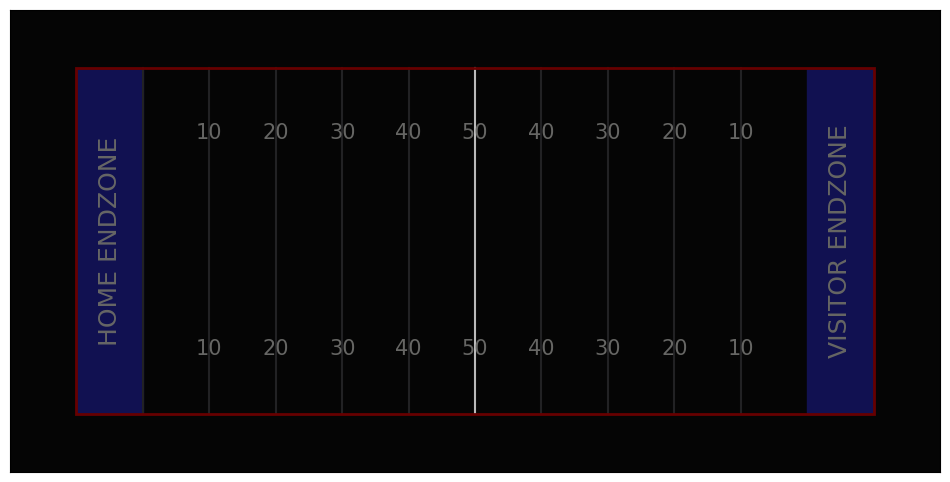

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# User Defined Function to create NFL Pitch
def NFLPitch() :
    fig, axs = plt.subplots(1,1,figsize=(12,6))
    axs.set_xlim(-10,130) 
    axs.set_ylim(-9,62.3) 
    
    axs.set_facecolor((int('01',16)/255,int('3d',16)/255,int('36',16)/255,0.6))
    axs.set_facecolor('black')
    
    axs.patch.set_alpha(0.98)
    
    axs.set_xticks([])
    axs.set_yticks([])
    axs.set_xticklabels([])
    axs.set_yticklabels([])
    
    end_zones = [ 
        patches.Rectangle((0,0), 10, 53.3, color='#111151'), 
        patches.Rectangle((110,0), 10, 53.3, color='#111151')  
    ]
    
    for ezs in end_zones :
        axs.add_patch(ezs)
    
    axs.text(5,53.3/2,s='HOME ENDZONE',color='#666666',verticalalignment='center', horizontalalignment='center',fontsize=18, rotation=90) # #660000
    axs.text(115,53.3/2,s='VISITOR ENDZONE',color='#666664',verticalalignment='center', horizontalalignment='center',fontsize=18, rotation = 90) # #666664
        
    
    return fig, axs

def add_Field_Markings(ax):
    
    # Yard lines
    for yard_x in range(10,110,10):
        ax.plot([yard_x,yard_x],[0,53.3], color='#222224') #white
        if yard_x <= 60 and yard_x > 10: #  and yard_x > 0 ? strange op
            ax.text(yard_x,0+10,s=str(yard_x-10),color='#666664',verticalalignment='center', horizontalalignment='center',fontsize=15)
            ax.text(yard_x,53.3-10,s=str(yard_x-10),color='#666664',verticalalignment='center', horizontalalignment='center',fontsize=15)
        elif yard_x > 60 : 
            ax.text(yard_x,0+10,s=str(110-yard_x),color='#666664',verticalalignment='center', horizontalalignment='center',fontsize=15)
            ax.text(yard_x,53.3-10,s=str(110-yard_x),color='#666664',verticalalignment='center', horizontalalignment='center',fontsize=15)

    # center line\
    ax.plot([60,60],[0,53.3], color='#CCCCCC', alpha = 0.9) # white
    
    

def add_border(ax) :
    border = patches.Rectangle((0,0),120,53.3, edgecolor='#660000', facecolor='none', lw=2.0, zorder=3)#,alpha=0)  color='black' 'white'
    ax.add_patch(border)
    
# NFL_Pitch()
fig, axs = NFLPitch()
add_border(axs)
add_Field_Markings(axs)
plt.show()

len(df_ball) 16


  0%|          | 0/3619 [00:00<?, ?it/s]

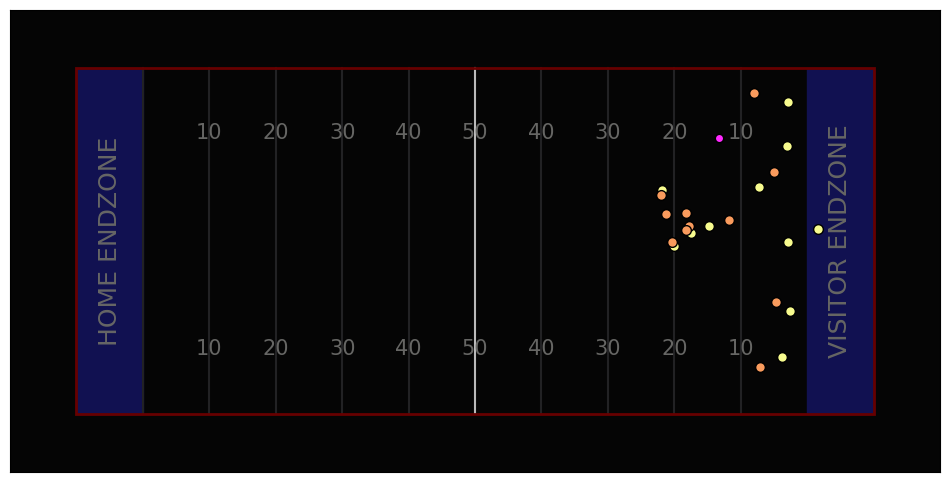

  1%|          | 19/3619 [00:02<06:28,  9.27it/s]


In [7]:

import numpy as np
import pandas as pd
from matplotlib import animation
from matplotlib import pyplot as plt

# from mplsoccer import Pitch # not pitch

# import sys

from tqdm import tqdm

from IPython.display import HTML


# tdf4 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv')
# tdf4.head()
tracking_data_9_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv')
tracking_data_9_df.head()

tracking_data_9_df_grouped_by_gameId = tracking_data_9_df.groupby('gameId')
tracking_data_9_df_grouped_by_gameId
# tracking_data_4_df_grouped_by_gameId.head()


# week_i, quarter_j = 9, 4
# w9 q4 
# tac 2022110609	4162
# nt 2022110600	3409
# gameId, playId
gameid_tac, playid_tac = 2022110609, 4162 # ok
# gameid_tac, playid_tac = 2022110601, 3370 # ok too
# gameid_tac, playid_tac = 2022110607, 3521 # wow 2022110603, 3064 # 2022110601, 3370 # 2022110300, 2926 # 2022110607, 3800
# gameid_nt, playid_nt = 2022110600, 3409


# # group_4_key_i = 2022100202
# # group_4_data = # specific_group
# group_key = 2022100202
# group_data = tracking_data_4_df_grouped_by_gameId.get_group(group_key)

group_key = gameid_tac
group_data = tracking_data_9_df_grouped_by_gameId.get_group(group_key)





        
        

col_val = 'football'
col_nam = 'displayName'
filtered_rows = group_data[group_data[col_nam] == col_val]
filtered_rows
filtered_rows.head()


col_value = 'football'
col_name = 'displayName'
football_data = group_data[group_data[col_name] == col_value]
football_data.head()


games_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/games.csv')
games_df[games_df['gameId'] == group_key]

home_team_df = group_data[group_data['club'] == games_df[games_df['gameId'] == group_key]['homeTeamAbbr'].iloc[0]]
visitor_team_df = group_data[group_data['club'] == games_df[games_df['gameId'] == group_key]['visitorTeamAbbr'].iloc[0]]

df_home = home_team_df.copy()
df_visitor = visitor_team_df.copy()
df_ball = football_data.copy() # NOT ONLY COPY

df_home.sort_values('time', inplace=True)
df_visitor.sort_values('time', inplace=True)
df_ball.sort_values('time', inplace=True)

print('len(df_ball)', len(df_ball.loc[(df_ball.playId == playid_tac) & (df_ball.gameId == gameid_tac)]))
pbar = tqdm(total=len(df_ball))

fig, ax = NFLPitch()
add_Field_Markings(ax)
add_border(ax)

marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}

ball, = ax.plot([], [], ms=6, markerfacecolor='#ff29ff', zorder=3, **marker_kwargs)  
away, = ax.plot([], [], ms=7, markerfacecolor='#f7fb8e', **marker_kwargs) 
home, = ax.plot([], [], ms=7, markerfacecolor='#f99b5d', **marker_kwargs) 

# del animate() :
def animate(i) :

    frame = df_ball.iloc[i,4]

    ball.set_data(df_ball.loc[(df_ball.frameId == frame) & (df_ball.playId == playid_tac) & (df_ball.gameId == gameid_tac), 'x'], df_ball.loc[(df_ball.frameId == frame) & (df_ball.playId == playid_tac) & (df_ball.gameId == gameid_tac), 'y'])
    away.set_data(df_visitor.loc[(df_visitor.frameId == frame) & (df_visitor.playId == playid_tac) & (df_visitor.gameId == gameid_tac), 'x'], df_visitor.loc[(df_visitor.frameId == frame) & (df_visitor.playId == playid_tac) & (df_visitor.gameId == gameid_tac), 'y'])
    home.set_data(df_home.loc[(df_home.frameId == frame) & (df_home.playId == playid_tac) & (df_home.gameId == gameid_tac), 'x'], df_home.loc[(df_home.frameId == frame) & (df_home.playId == playid_tac) & (df_home.gameId == gameid_tac), 'y'])

    
    pbar.update(1)
    
    return ball, away, home

anim = animation.FuncAnimation(fig, animate, frames=len(df_ball.loc[(df_ball.playId == playid_tac) & (df_ball.gameId == gameid_tac)]), interval=150, blit=True)

plt.show()



anim_html = anim.to_jshtml()

HTML(anim_html)

pbar.close()

In [8]:
anim_html = anim.to_jshtml()

HTML(anim_html)

len(df_ball) 56


  0%|          | 0/56 [00:00<?, ?it/s]

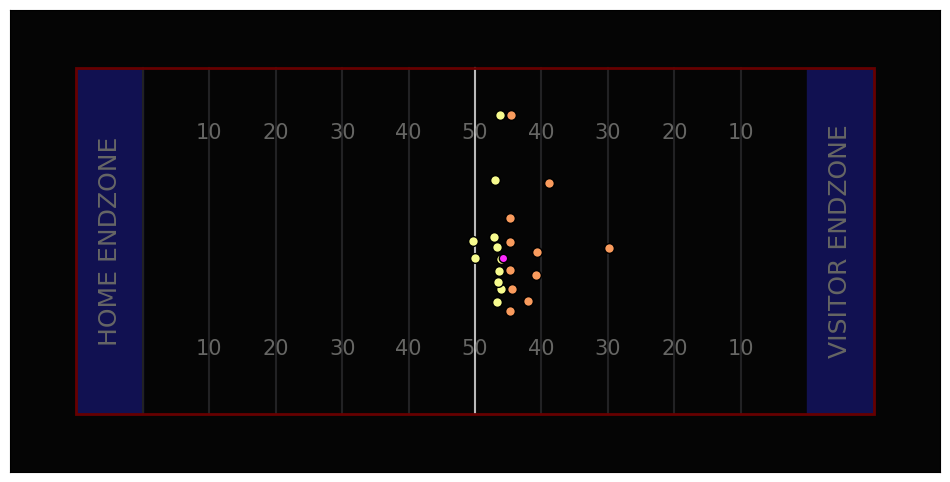

59it [00:06,  9.19it/s]                        


In [11]:

import numpy as np
import pandas as pd
from matplotlib import animation
from matplotlib import pyplot as plt

# from mplsoccer import Pitch # not pitch

# import sys

from tqdm import tqdm

from IPython.display import HTML


# tdf4 = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_4.csv')
# tdf4.head()
tracking_data_9_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/tracking_week_9.csv')
tracking_data_9_df.head()

# tracking_data_9_df = tracking_data_9_df[tracking_data_9_df[['frameId']] > 7]
tracking_data_9_df_grouped_by_gameId = tracking_data_9_df.groupby('gameId')
tracking_data_9_df_grouped_by_gameId
# tracking_data_4_df_grouped_by_gameId.head()


# week_i, quarter_j = 9, 4
# w9 q4 
# tac 2022110609	4162
# nt 2022110600	3409
# gameId, playId
gameid_tac, playid_tac = 2022110609, 4162
# gameid_ntac, playid_ntac = 2022110600, 3409
gameid_ntac, playid_ntac = 2022110603, 3085 #ok
# gameid_ntac, playid_ntac = 2022110602,3450 #2022110606, 2993 #2022110602,3450 _oksw #2022110610,  #2022110602, 3645 # 2022110605, 3676 # 2022110604, 3681 # 2022110606, 2993

# # group_4_key_i = 2022100202
# # group_4_data = # specific_group
# group_key = 2022100202
# group_data = tracking_data_4_df_grouped_by_gameId.get_group(group_key)

group_key = gameid_ntac
group_data = tracking_data_9_df_grouped_by_gameId.get_group(group_key)

col_val = 'football'
col_nam = 'displayName'
filtered_rows = group_data[group_data[col_nam] == col_val]
filtered_rows
filtered_rows.head()


col_value = 'football'
col_name = 'displayName'

football_data = group_data[group_data[col_name] == col_value]
football_data.head()


games_df = pd.read_csv('/kaggle/input/nfl-big-data-bowl-2024/games.csv')
games_df[games_df['gameId'] == group_key]

home_team_df = group_data[group_data['club'] == games_df[games_df['gameId'] == group_key]['homeTeamAbbr'].iloc[0]]
visitor_team_df = group_data[group_data['club'] == games_df[games_df['gameId'] == group_key]['visitorTeamAbbr'].iloc[0]]

df_home = home_team_df.copy()
df_visitor = visitor_team_df.copy()
df_ball = football_data.copy() 

df_home.sort_values('time', inplace=True)
df_visitor.sort_values('time', inplace=True)
df_ball.sort_values('time', inplace=True)

print('len(df_ball)', len(df_ball.loc[(df_ball.playId == playid_ntac) & (df_ball.gameId == gameid_ntac)]))
pbar = tqdm(total=len(df_ball.loc[(df_ball.playId == playid_ntac)]))

fig, ax = NFLPitch()
add_Field_Markings(ax)
add_border(ax)

marker_kwargs = {'marker': 'o', 'markeredgecolor': 'black', 'linestyle': 'None'}

ball, = ax.plot([], [], ms=6, markerfacecolor='#ff29ff', zorder=3, **marker_kwargs)
away, = ax.plot([], [], ms=7, markerfacecolor='#f7fb8e', **marker_kwargs) 
home, = ax.plot([], [], ms=7, markerfacecolor='#f99b5d', **marker_kwargs) 

def animate(i) :

    frame = df_ball.iloc[i,4]

    ball.set_data(df_ball.loc[(df_ball.frameId == frame) & (df_ball.playId == playid_ntac) & (df_ball.gameId == gameid_ntac), 'x'], df_ball.loc[(df_ball.frameId == frame) & (df_ball.playId == playid_ntac) & (df_ball.gameId == gameid_ntac), 'y'])
    away.set_data(df_visitor.loc[(df_visitor.frameId == frame) & (df_visitor.playId == playid_ntac) & (df_visitor.gameId == gameid_ntac), 'x'], df_visitor.loc[(df_visitor.frameId == frame) & (df_visitor.playId == playid_ntac) & (df_visitor.gameId == gameid_ntac), 'y'])
    home.set_data(df_home.loc[(df_home.frameId == frame) & (df_home.playId == playid_ntac) & (df_home.gameId == gameid_ntac), 'x'], df_home.loc[(df_home.frameId == frame) & (df_home.playId == playid_ntac) & (df_home.gameId == gameid_ntac), 'y'])
   
    
    pbar.update(1)
    
    return ball, away, home

anim = animation.FuncAnimation(fig, animate, frames=len(df_ball.loc[(df_ball.playId == playid_ntac) & (df_ball.gameId == gameid_ntac)]), interval=100, blit=True)

plt.show()



anim_html = anim.to_jshtml()

HTML(anim_html)

pbar.close()

In [12]:
anim_html = anim.to_jshtml()

HTML(anim_html)

<hr>